In [58]:
from tensorflow.keras.applications.resnet50 import ResNet50 as pretrainedModel , preprocess_input

In [65]:
from tensorflow.keras.layers import Flatten, Dense

In [67]:
from keras import models
from tensorflow.keras.models import Model

In [37]:
from tensorflow.keras.preprocessing import image

In [18]:
train_path = '/content/data/train'

In [19]:
valid_path = '/content/data/test'

In [20]:
image_size= [50,50]

In [21]:
from glob import glob

In [22]:
imageFiles = glob( train_path + '/*/*.jpeg')

In [23]:
imageFiles

['/content/data/train/ill/6.jpeg',
 '/content/data/train/ill/3.jpeg',
 '/content/data/train/ill/2.jpeg',
 '/content/data/train/ill/4.jpeg',
 '/content/data/train/ill/5.jpeg',
 '/content/data/train/ill/1.jpeg',
 '/content/data/train/normal/6.jpeg',
 '/content/data/train/normal/3.jpeg',
 '/content/data/train/normal/2.jpeg',
 '/content/data/train/normal/4.jpeg',
 '/content/data/train/normal/5.jpeg',
 '/content/data/train/normal/1.jpeg']

In [27]:
validFiles = glob( valid_path + '/*/*.jpeg')

In [28]:
validFiles

['/content/data/test/ill/6.jpeg',
 '/content/data/test/ill/3.jpeg',
 '/content/data/test/ill/2.jpeg',
 '/content/data/test/ill/4.jpeg',
 '/content/data/test/ill/5.jpeg',
 '/content/data/test/ill/1.jpeg',
 '/content/data/test/normal/6.jpeg',
 '/content/data/test/normal/3.jpeg',
 '/content/data/test/normal/2.jpeg',
 '/content/data/test/normal/4.jpeg',
 '/content/data/test/normal/5.jpeg',
 '/content/data/test/normal/1.jpeg']

In [29]:
folders = glob(train_path + '/*')

In [31]:
folders

['/content/data/train/ill', '/content/data/train/normal']

In [32]:
import matplotlib.pyplot as plt

In [35]:
import numpy as np

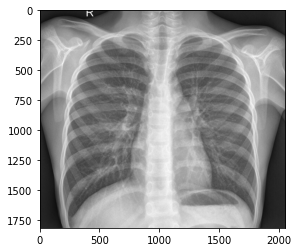

In [40]:
plt.imshow(image.load_img(np.random.choice(imageFiles)))

In [62]:
ptm = pretrainedModel(
    
input_shape = image_size + [3],
weights= 'imagenet',
include_top = False



)

94765736/94765736 [==============================] - 5s 0us/step


In [63]:
ptm.trainable = False

In [64]:
k = len(folders)

In [68]:
x = Flatten()(ptm.output)
x = Dense(k, activation = 'softmax')(x)
model = Model (inputs = ptm.input, outputs = x)

In [70]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(
    
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  preprocessing_function= preprocess_input


)

In [73]:
batchsize = 128

In [74]:
train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size= image_size,
    batch_size= batchsize




)

Found 12 images belonging to 2 classes.


In [76]:
valid_generator = gen.flow_from_directory(
    valid_path,
    shuffle=True,
    target_size= image_size,
    batch_size= batchsize



)

Found 12 images belonging to 2 classes.


In [78]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [79]:
r = model.fit_generator(train_generator, validation_data= valid_generator, epochs =5)

<ipython-input-79-6d96cb70fab0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data= valid_generator, epochs =5)


Epoch 1/5
1/1 [==============================] - 8s 8s/step - loss: 2.6960 - accuracy: 0.5000 - val_loss: 3.4854 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 1s 824ms/step - loss: 4.6152 - accuracy: 0.5000 - val_loss: 3.6151 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 1s 787ms/step - loss: 1.7375 - accuracy: 0.5833 - val_loss: 1.1483 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 0.2078 - accuracy: 0.8333 - val_loss: 1.4930 - val_accuracy: 0.4167
Epoch 5/5
1/1 [==============================] - 1s 803ms/step - loss: 0.7735 - accuracy: 0.8333 - val_loss: 0.7647 - val_accuracy: 0.7500


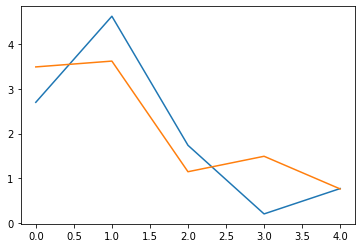

In [80]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

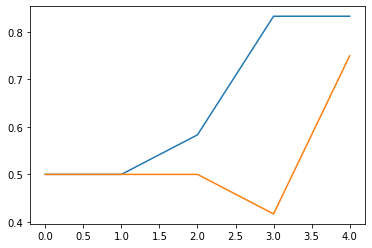

In [81]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')